# Data Exploration

## Import

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import funcs

In [3]:
df_master = pd.read_csv("archive/Base.csv")
df_master.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


## Explore features

In [4]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
print("Num instances fraud", n_fraud := len(df_master[df_master["fraud_bool"]==1]), f", {n_fraud/1000000}%")
print("Num instances not fraud", n_not_fraud := len(df_master[df_master["fraud_bool"]==0]), f", {n_not_fraud/1000000}%")

Num instances fraud 11029 , 0.011029%
Num instances not fraud 988971 , 0.988971%


In [6]:
cats = list()
print("CATEGORICAL COLUMS (NOT BOOLEANS)")
print("_________________________________")
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.object_)):
        print(col, ",", df_master[col].unique())
        cats.append(col)

CATEGORICAL COLUMS (NOT BOOLEANS)
_________________________________
payment_type , ['AA' 'AB' 'AC' 'AD' 'AE']
employment_status , ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status , ['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
source , ['INTERNET' 'TELEAPP']
device_os , ['windows' 'other' 'linux' 'macintosh' 'x11']


In [7]:
bools = list()
counts = list()
no_info = list()
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.int64)):
        if (l := len(df_master[col].unique())) == 2:
            bools.append(col)
        elif l > 2:
            counts.append(col)
        else:
            no_info.append(col) #less than 2 unique values, useless
print("BOOLEANS, 0s, 1s")
print("________________")
for b in bools:
    print(f"{b}, {len(df_master[df_master[b]==0])}, {len(df_master[df_master[b]==1])}")
print("\n")
print("COUNTERS, Min, Avg, Max")
print("_______________________")
for c in counts:
    print(f"{c}, {min(df_master[c])}, {np.mean(df_master[c])}, {max(df_master[c])}")

print("\n")
print("NO INFO, Single Value")
print("________")
for b in no_info:
    print(b, df_master[b].unique())

BOOLEANS, 0s, 1s
________________
fraud_bool, 988971, 11029
email_is_free, 470114, 529886
phone_home_valid, 582923, 417077
phone_mobile_valid, 110324, 889676
has_other_cards, 777012, 222988
foreign_request, 974758, 25242
keep_alive_session, 423053, 576947


COUNTERS, Min, Avg, Max
_______________________
prev_address_months_count, -1, 16.718568, 383
current_address_months_count, -1, 86.587867, 428
customer_age, 10, 33.68908, 90
zip_count_4w, 1, 1572.692049, 6700
bank_branch_count_8w, 0, 184.361849, 2385
date_of_birth_distinct_emails_4w, 0, 9.503544, 39
credit_risk_score, -170, 130.989595, 389
bank_months_count, -1, 10.839303, 32
device_distinct_emails_8w, -1, 1.018312, 2
month, 0, 3.288674, 7


NO INFO, Single Value
________
device_fraud_count [0]


In [8]:
print("CONTINUOUS VALUES")
print("_________________")
nums = list()
for col in df_master:
    if (df_master[col].dtype==np.dtype(np.float64)):
        print(f"{col}, {min(df_master[col])}, {np.mean(df_master[col])}, {max(df_master[col])}")
        nums.append(col)

CONTINUOUS VALUES
_________________
income, 0.1, 0.5626956000000002, 0.9
name_email_similarity, 1.4345504845275636e-06, 0.4936940949631277, 0.9999993177937188
days_since_request, 4.036859788721786e-09, 1.025705230995808, 78.45690383509861
intended_balcon_amount, -15.530554840076814, 8.661498537172486, 112.9569276953714
velocity_6h, -170.60307235124628, 5665.296604795269, 16715.565404174275
velocity_24h, 1300.3073144849477, 4769.781964962282, 9506.896596111665
velocity_4w, 2825.748405284728, 4856.324015811874, 6994.764200834217
proposed_credit_limit, 190.0, 515.85101, 2100.0
session_length_in_minutes, -1.0, 7.544940201289998, 85.89914319274027


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_master.loc[:, df_master.columns != "fraud_bool"], df_master["fraud_bool"])

## Handle Missing Data

In [116]:
df = X_train #Note this still contains validation set
df["fraud_bool"] = y_train

In [111]:
"""
The data set represents missing values with -1 for the following columns:
- prev_address_months_count
- current_address_months_count
- bank_months_count
- session_length_in_minutes
- device_distinct_emails_8w
"""

#### **prev_address_months_count** and **bank_months_count**

For these 2 features, the documentation it is noted this value represents the age of an applicants previous address or bank account (if registered or held). -1 is then not a missing value but rather an indicator that they did not previously have an account or another address. We will not edit these columns. 

In [89]:
# Features where -1 represents missing value
missing_feats = [
    "current_address_months_count",
    "session_length_in_minutes",
    "device_distinct_emails_8w"
]

### Check for Missing Randomness

In [90]:
from scipy.stats import chi2_contingency

In [117]:
a = .01
for feat in missing_feats:
    # Get Count of missing values for fraud vs non fraud
    miss = df[df[feat]==-1].groupby("fraud_bool")[feat].count()
    no_miss = df[df[feat]!=-1].groupby("fraud_bool")[feat].count()
    # Check for missing randomness
    chi2, p, dof, ex = chi2_contingency([[miss[0], no_miss[0]],[miss[1],no_miss[1]]])
    # Print results
    if p < a:
        print(f"{feat} missing NOT AT RANDOM, p = {p}")
    else: print(f"{feat} missing AT RANDOM, p = {p}")
    print(f"""
    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | {miss[0]}\t\t| {no_miss[0]}\t\t| {miss[0]/no_miss[0]}
    # Fraud     | {miss[1]}\t\t| {no_miss[1]}\t\t| {miss[1]/no_miss[1]}
    """)

prev_address_months_count missing NOT AT RANDOM, p = 0.0

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 526778		| 214930		| 2.4509282091843856
    # Fraud     | 7631		| 661		| 11.5446293494705
    
current_address_months_count missing NOT AT RANDOM, p = 1.1499065095775863e-05

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 3193		| 738515		| 0.0043235411603014156
    # Fraud     | 9		| 8283		| 0.0010865628395508873
    
bank_months_count missing NOT AT RANDOM, p = 2.0638268057714302e-153

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 186915		| 554793		| 0.33690944189995187
    # Fraud     | 3141		| 5151		| 0.609784507862551
    
session_length_in_minutes missing AT RANDOM, p = 0.4212762811014139

    #           | Missing (True)  | Not Missing (False) | Ratio Miss/No Miss
    # No Fraud  | 1504		| 740204		| 0.002031872294664714
    # Fraud    

### Missing Not At Random

**current address months count** is our only feature missing not at random. We will use the SKLearn Iterative Imputer to replace the missing values.

In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import importlib

In [150]:
# Make imputer
importlib.reload(funcs)
imputer  = IterativeImputer(random_state=42)
df_imputed = funcs.transform_df(df, imputer=imputer, fit_imputer=True)

In [153]:
df_imputed["current_address_months_count"].describe()

count    748383.000000
mean         86.911758
std          88.170465
min           0.000000
25%          20.000000
50%          53.000000
75%         130.000000
max         428.000000
Name: current_address_months_count, dtype: float64

### Missing at Random

Because of the large size of our dataset and the small amount of instances with missing data for our 2 features we determined were missing at random, we can simply drop the instances that are missing these values. Note: This is done in out "transform_df" func so we can easily do the same thing to future data.

In [94]:
df

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,88,50,0.020925,-1.331345,AA,769,10650.765523,...,0,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,144,50,0.005418,-0.816224,AB,366,534.047319,...,0,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,132,40,3.108549,-0.755728,AC,870,4048.534263,...,1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,22,50,0.019079,-1.205124,AB,810,3457.064063,...,1,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,218,50,0.004441,-0.773276,AB,890,5020.341679,...,0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,104,40,0.030592,-1.044454,AB,804,7905.711839,...,1,0,200.0,0,INTERNET,8.511502,linux,1,1,4
999996,0,0.8,0.322989,9,50,1.628119,-1.409803,AC,3306,5391.470463,...,1,0,200.0,0,INTERNET,8.967865,windows,0,1,4
999997,0,0.8,0.879403,30,20,0.018563,34.692760,AA,1522,8063.102636,...,1,0,200.0,0,INTERNET,8.195531,other,0,1,4
999998,0,0.9,0.762112,189,20,0.015352,94.661055,AA,1418,8092.641762,...,0,0,500.0,0,INTERNET,4.336064,windows,1,1,4


## Visualize

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 2 artists>

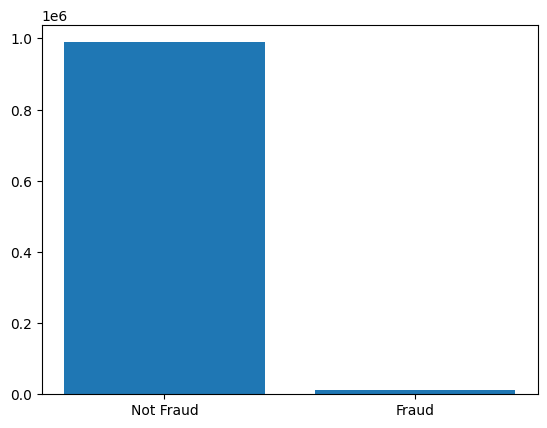

In [13]:
plt.bar(["Not Fraud", "Fraud"], [n_not_fraud, n_fraud])

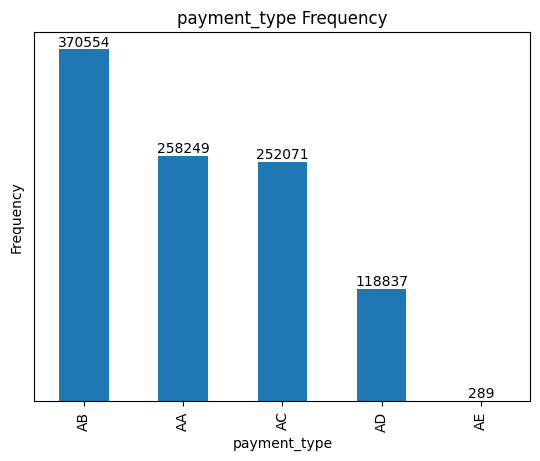

In [14]:
ax = df_master["payment_type"].value_counts().plot(kind="bar")
ax.set_title("payment_type Frequency")
ax.set_xlabel("payment_type")
ax.set_ylabel("Frequency")
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(df_master["payment_type"].value_counts().index)

rects = ax.patches

# Make some labels.
labels = df_master["payment_type"].value_counts()

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

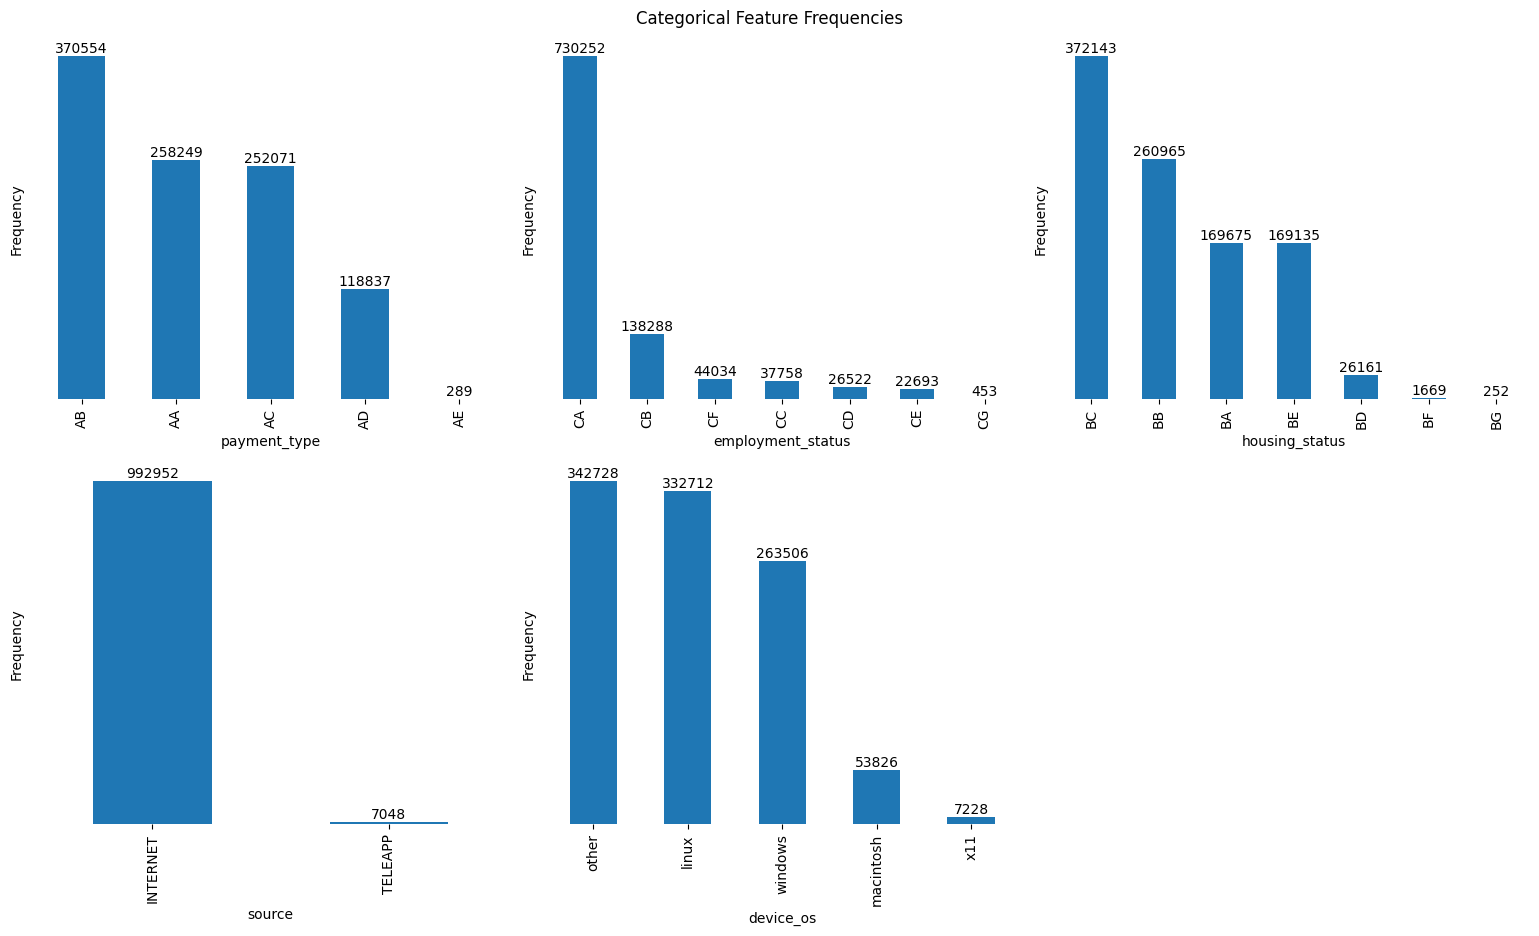

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15.5,9.5))

for i, cat in enumerate(cats):
    ax = axes[i // 3][i % 3]
    ax = df_master[cat].value_counts().plot(kind="bar", ax = ax)
    ax.set_xlabel(cat)
    ax.set_ylabel("Frequency")
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(df_master[cat].value_counts().index)

    rects = ax.patches

    # Make some labels.
    labels = df_master[cat].value_counts()

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
        )
fig.suptitle("Categorical Feature Frequencies")
fig.delaxes(axes[-1,-1])
fig.tight_layout()


KeyboardInterrupt: 

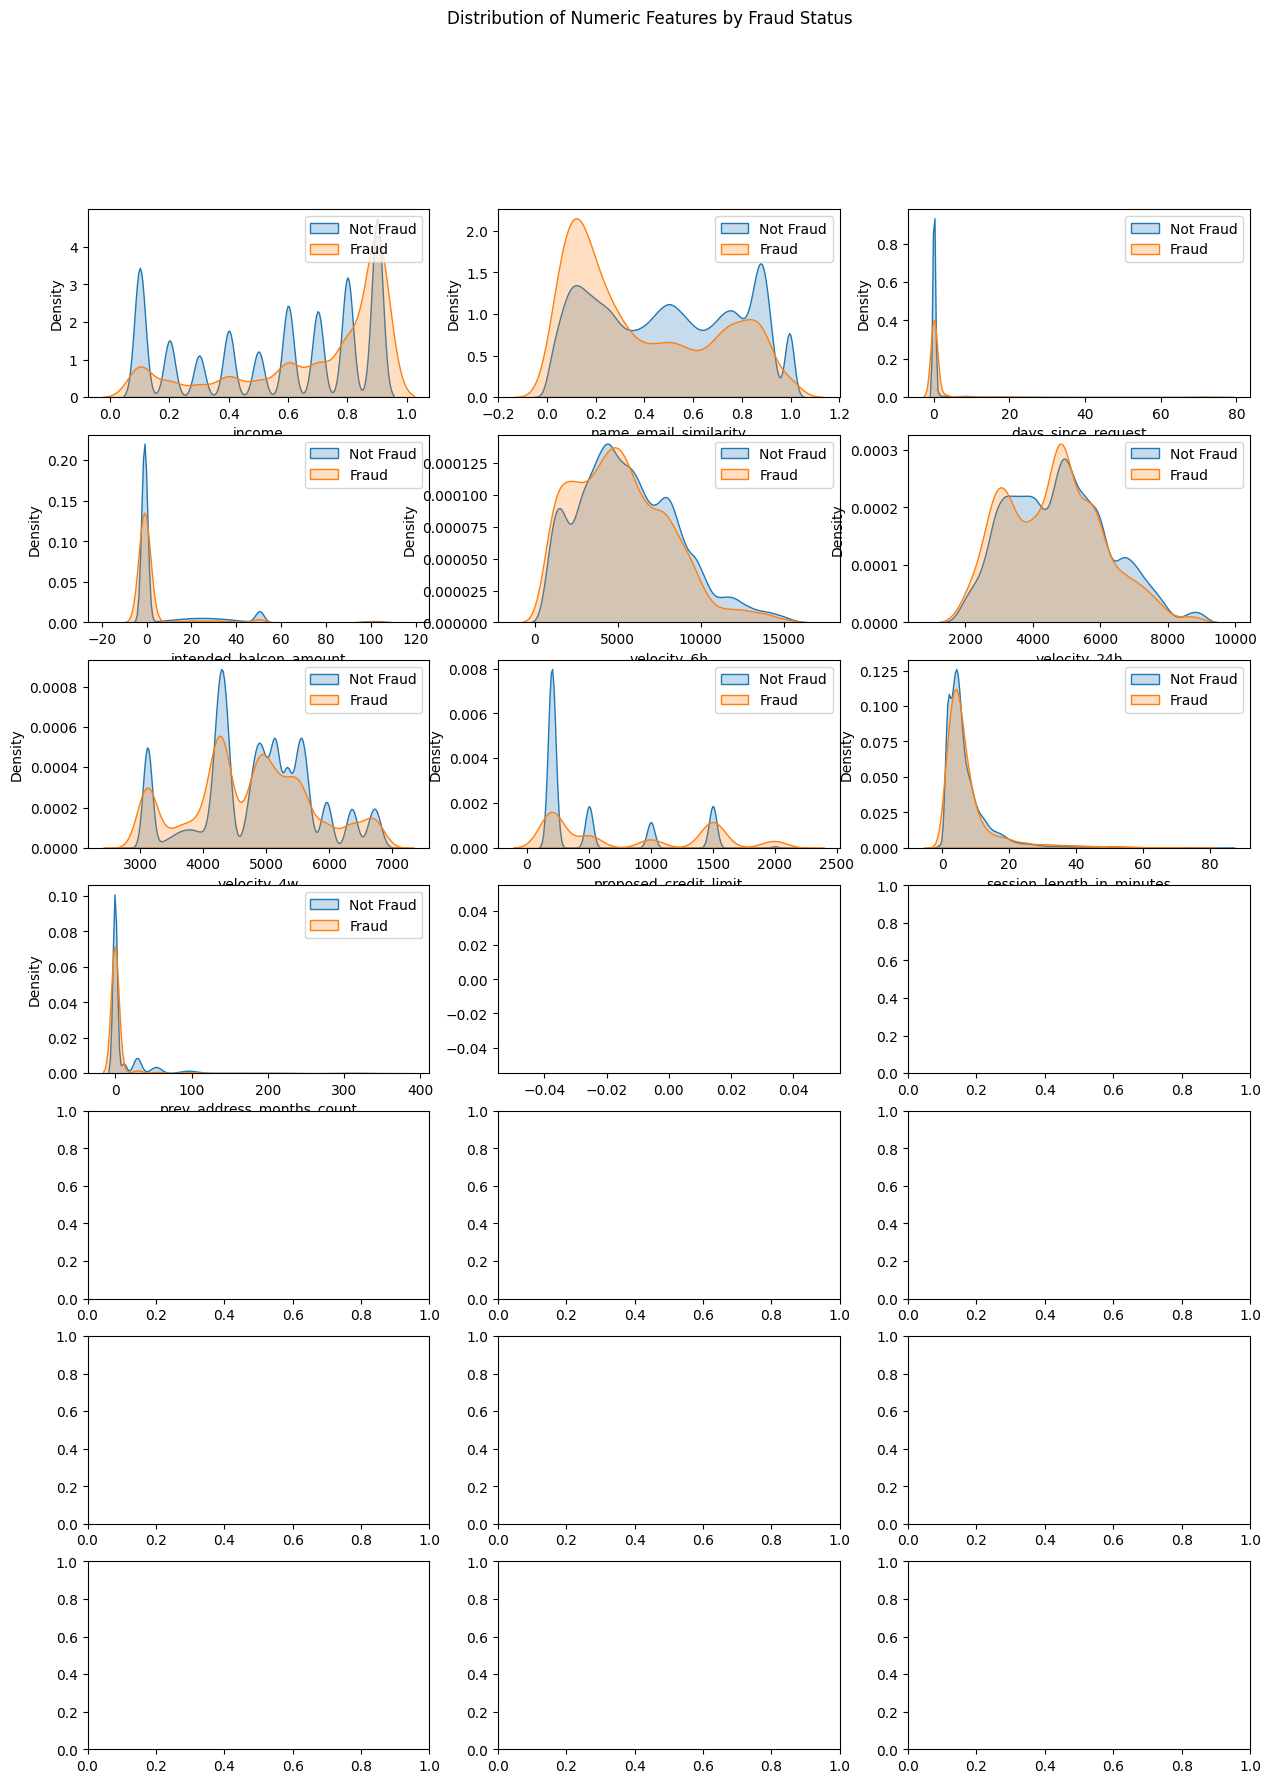

In [16]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(nums + counts):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df_master[df_master['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df_master[df_master['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

<BarContainer object of 9 artists>

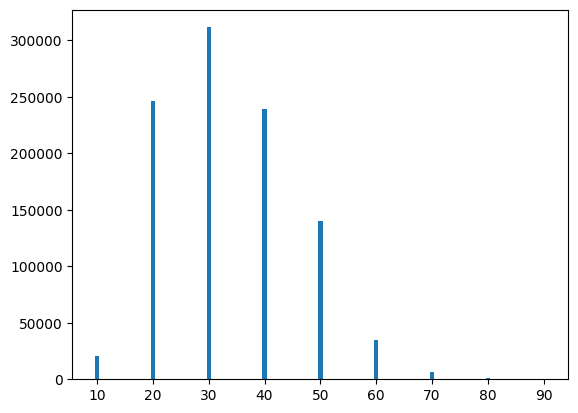

In [ ]:
plt.bar(df_master["customer_age"].value_counts().index, df_master["customer_age"].value_counts())

<BarContainer object of 9 artists>

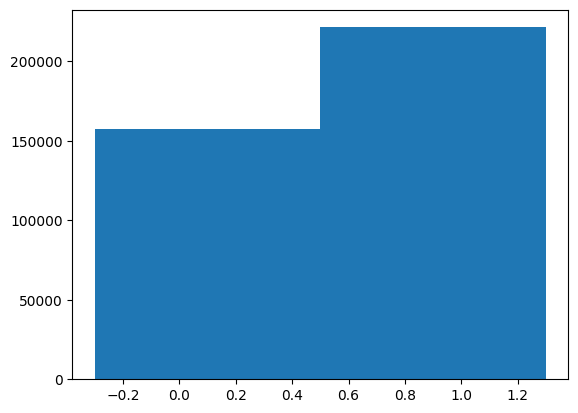

In [ ]:
plt.bar(df_master["income"].value_counts().index, df_master["income"].value_counts())

<BarContainer object of 7 artists>

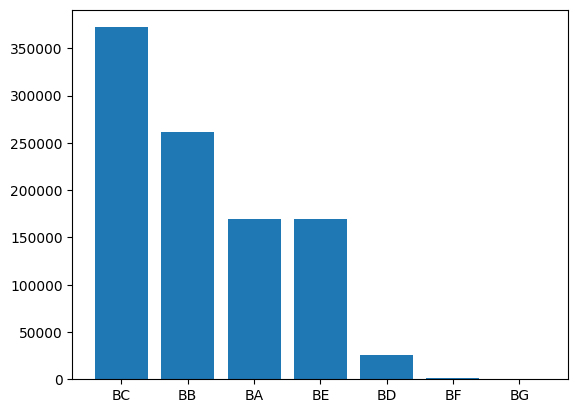

In [ ]:
plt.bar(df_master["housing_status"].value_counts().index, df_master["housing_status"].value_counts())